<a href="https://colab.research.google.com/github/lowbee2019/Files/blob/master/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#将数据1中的"FNCLCC grade"转换成"FNCLCC_grade"

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *
import numpy as np
import pandas as pd
from openpyxl import load_workbook
import seaborn as sns
from sklearn import preprocessing

# Initial: get the raw data

In [2]:
import numpy as np
import scipy
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import roc_curve,auc,roc_auc_score

import matplotlib.pyplot as plt
from openpyxl import load_workbook

In [3]:
path ="/content/drive/MyDrive/Document/数据1.xlsx"
df = pd.read_excel(path,engine="openpyxl")

In [4]:
df.head()

,ID,SOURCE,FNCLCC_grade,TIME,T1_original_shape_Elongation,T1_original_shape_Flatness,T1_original_shape_LeastAxisLength,T1_original_shape_MajorAxisLength,T1_original_shape_Maximum2DDiameterColumn,T1_original_shape_Maximum2DDiameterRow,T1_original_shape_Maximum2DDiameterSlice,T1_original_shape_Maximum3DDiameter,T1_original_shape_MeshVolume,T1_original_shape_MinorAxisLength,T1_original_shape_Sphericity,T1_original_shape_SurfaceArea,T1_original_shape_SurfaceVolumeRatio,T1_original_shape_VoxelVolume,T1_original_firstorder_10Percentile,T1_original_firstorder_90Percentile,T1_original_firstorder_Energy,T1_original_firstorder_Entropy,T1_original_firstorder_InterquartileRange,T1_original_firstorder_Kurtosis,T1_original_firstorder_Maximum,T1_original_firstorder_MeanAbsoluteDeviation,T1_original_firstorder_Mean,T1_original_firstorder_Median,T1_original_firstorder_Minimum,T1_original_firstorder_Range,T1_original_firstorder_RobustMeanAbsoluteDeviation,T1_original_firstorder_RootMeanSquared,T1_original_firstorder_Skewness,T1_original_firstorder_TotalEnergy,T1_original_firstorder_Uniformity,T1_original_firstorder_Variance,T1_original_glcm_Autocorrelation,T1_original_glcm_JointAverage,T1_original_glcm_ClusterProminence,T1_original_glcm_ClusterShade,...,T2_lbp-2D_glrlm_RunPercentage,T2_lbp-2D_glrlm_RunVariance,T2_lbp-2D_glrlm_ShortRunEmphasis,T2_lbp-2D_glrlm_ShortRunHighGrayLevelEmphasis,T2_lbp-2D_glrlm_ShortRunLowGrayLevelEmphasis,T2_lbp-2D_glszm_GrayLevelNonUniformity,T2_lbp-2D_glszm_GrayLevelNonUniformityNormalized,T2_lbp-2D_glszm_GrayLevelVariance,T2_lbp-2D_glszm_HighGrayLevelZoneEmphasis,T2_lbp-2D_glszm_LargeAreaEmphasis,T2_lbp-2D_glszm_LargeAreaHighGrayLevelEmphasis,T2_lbp-2D_glszm_LargeAreaLowGrayLevelEmphasis,T2_lbp-2D_glszm_LowGrayLevelZoneEmphasis,T2_lbp-2D_glszm_SizeZoneNonUniformity,T2_lbp-2D_glszm_SizeZoneNonUniformityNormalized,T2_lbp-2D_glszm_SmallAreaEmphasis,T2_lbp-2D_glszm_SmallAreaHighGrayLevelEmphasis,T2_lbp-2D_glszm_SmallAreaLowGrayLevelEmphasis,T2_lbp-2D_glszm_ZoneEntropy,T2_lbp-2D_glszm_ZonePercentage,T2_lbp-2D_glszm_ZoneVariance,T2_lbp-2D_gldm_DependenceEntropy,T2_lbp-2D_gldm_DependenceNonUniformity,T2_lbp-2D_gldm_DependenceNonUniformityNormalized,T2_lbp-2D_gldm_DependenceVariance,T2_lbp-2D_gldm_GrayLevelNonUniformity,T2_lbp-2D_gldm_GrayLevelVariance,T2_lbp-2D_gldm_HighGrayLevelEmphasis,T2_lbp-2D_gldm_LargeDependenceEmphasis,T2_lbp-2D_gldm_LargeDependenceHighGrayLevelEmphasis,T2_lbp-2D_gldm_LargeDependenceLowGrayLevelEmphasis,T2_lbp-2D_gldm_LowGrayLevelEmphasis,T2_lbp-2D_gldm_SmallDependenceEmphasis,T2_lbp-2D_gldm_SmallDependenceHighGrayLevelEmphasis,T2_lbp-2D_gldm_SmallDependenceLowGrayLevelEmphasis,T2_lbp-2D_ngtdm_Busyness,T2_lbp-2D_ngtdm_Coarseness,T2_lbp-2D_ngtdm_Complexity,T2_lbp-2D_ngtdm_Contrast,T2_lbp-2D_ngtdm_Strength
0,140999,2.0,1.0,40.0,0.596244,0.486735,52.063320,106.964313,116.619094,135.507441,80.919713,136.228729,229691.37980,63.776824,0.697354,26009.203160,0.113235,231498.13080,-31.481636,6.227611,3.564084e+08,3.692858,20.210780,20.275447,174.665738,13.185712,-12.327747,-14.282435,-57.219091,231.884829,8.552842,288.334891,2.793937,1.924606e+10,0.094723,381.684507,106.276189,9.852868,27675.420320,546.128461,...,0.521915,1.771271,0.604388,1.534747,0.371798,54.750000,0.570312,0.214844,3.062500,8587.218750,17324.218750,6402.968750,0.484375,22.708333,0.236545,0.500215,1.720681,0.195099,3.867813,0.026381,7150.334961,3.610008,654.308052,0.179804,2.451262,1869.460016,0.243135,2.251443,25.728772,52.361913,19.070486,0.687139,0.072090,0.188458,0.042999,1710.831040,0.001162,0.472851,0.114806,0.001164
1,161157,2.0,1.0,47.0,0.831942,0.626533,28.064491,44.793331,50.478237,51.614460,48.166378,55.064076,27523.40903,37.265456,0.660890,6670.468078,0.242356,28056.41695,-91.795709,-20.886758,6.931363e+07,4.409366,29.008603,13.880427,196.300647,24.723969,-59.659565,-68.091071,-121.222086,317.522733,12.705967,243.501744,2.811486,1.663552e+09,0.064001,1529.574537,222.748740,13.424023,557182.665700,7943.980393,...,0.509755,1.839

In [5]:
df.FNCLCC_grade.value_counts()

1.0    214
0.0     68
Name: FNCLCC_grade, dtype: int64

In [6]:
DF = df.drop(df.tail(330-282).index) #原数据一读就是330行，不知道什么情况

In [7]:
y = DF.FNCLCC_grade
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: FNCLCC_grade, dtype: float64

In [8]:
x = DF.drop('FNCLCC_grade',axis=1)
x = x.drop('ID',axis=1)
x.head()

,SOURCE,TIME,T1_original_shape_Elongation,T1_original_shape_Flatness,T1_original_shape_LeastAxisLength,T1_original_shape_MajorAxisLength,T1_original_shape_Maximum2DDiameterColumn,T1_original_shape_Maximum2DDiameterRow,T1_original_shape_Maximum2DDiameterSlice,T1_original_shape_Maximum3DDiameter,T1_original_shape_MeshVolume,T1_original_shape_MinorAxisLength,T1_original_shape_Sphericity,T1_original_shape_SurfaceArea,T1_original_shape_SurfaceVolumeRatio,T1_original_shape_VoxelVolume,T1_original_firstorder_10Percentile,T1_original_firstorder_90Percentile,T1_original_firstorder_Energy,T1_original_firstorder_Entropy,T1_original_firstorder_InterquartileRange,T1_original_firstorder_Kurtosis,T1_original_firstorder_Maximum,T1_original_firstorder_MeanAbsoluteDeviation,T1_original_firstorder_Mean,T1_original_firstorder_Median,T1_original_firstorder_Minimum,T1_original_firstorder_Range,T1_original_firstorder_RobustMeanAbsoluteDeviation,T1_original_firstorder_RootMeanSquared,T1_original_firstorder_Skewness,T1_original_firstorder_TotalEnergy,T1_original_firstorder_Uniformity,T1_original_firstorder_Variance,T1_original_glcm_Autocorrelation,T1_original_glcm_JointAverage,T1_original_glcm_ClusterProminence,T1_original_glcm_ClusterShade,T1_original_glcm_ClusterTendency,T1_original_glcm_Contrast,...,T2_lbp-2D_glrlm_RunPercentage,T2_lbp-2D_glrlm_RunVariance,T2_lbp-2D_glrlm_ShortRunEmphasis,T2_lbp-2D_glrlm_ShortRunHighGrayLevelEmphasis,T2_lbp-2D_glrlm_ShortRunLowGrayLevelEmphasis,T2_lbp-2D_glszm_GrayLevelNonUniformity,T2_lbp-2D_glszm_GrayLevelNonUniformityNormalized,T2_lbp-2D_glszm_GrayLevelVariance,T2_lbp-2D_glszm_HighGrayLevelZoneEmphasis,T2_lbp-2D_glszm_LargeAreaEmphasis,T2_lbp-2D_glszm_LargeAreaHighGrayLevelEmphasis,T2_lbp-2D_glszm_LargeAreaLowGrayLevelEmphasis,T2_lbp-2D_glszm_LowGrayLevelZoneEmphasis,T2_lbp-2D_glszm_SizeZoneNonUniformity,T2_lbp-2D_glszm_SizeZoneNonUniformityNormalized,T2_lbp-2D_glszm_SmallAreaEmphasis,T2_lbp-2D_glszm_SmallAreaHighGrayLevelEmphasis,T2_lbp-2D_glszm_SmallAreaLowGrayLevelEmphasis,T2_lbp-2D_glszm_ZoneEntropy,T2_lbp-2D_glszm_ZonePercentage,T2_lbp-2D_glszm_ZoneVariance,T2_lbp-2D_gldm_DependenceEntropy,T2_lbp-2D_gldm_DependenceNonUniformity,T2_lbp-2D_gldm_DependenceNonUniformityNormalized,T2_lbp-2D_gldm_DependenceVariance,T2_lbp-2D_gldm_GrayLevelNonUniformity,T2_lbp-2D_gldm_GrayLevelVariance,T2_lbp-2D_gldm_HighGrayLevelEmphasis,T2_lbp-2D_gldm_LargeDependenceEmphasis,T2_lbp-2D_gldm_LargeDependenceHighGrayLevelEmphasis,T2_lbp-2D_gldm_LargeDependenceLowGrayLevelEmphasis,T2_lbp-2D_gldm_LowGrayLevelEmphasis,T2_lbp-2D_gldm_SmallDependenceEmphasis,T2_lbp-2D_gldm_SmallDependenceHighGrayLevelEmphasis,T2_lbp-2D_gldm_SmallDependenceLowGrayLevelEmphasis,T2_lbp-2D_ngtdm_Busyness,T2_lbp-2D_ngtdm_Coarseness,T2_lbp-2D_ngtdm_Complexity,T2_lbp-2D_ngtdm_Contrast,T2_lbp-2D_ngtdm_Strength
0,2.0,40.0,0.596244,0.486735,52.063320,106.964313,116.619094,135.507441,80.919713,136.228729,229691.37980,63.776824,0.697354,26009.203160,0.113235,231498.13080,-31.481636,6.227611,3.564084e+08,3.692858,20.210780,20.275447,174.665738,13.185712,-12.327747,-14.282435,-57.219091,231.884829,8.552842,288.334891,2.793937,1.924606e+10,0.094723,381.684507,106.276189,9.852868,27675.420320,546.128461,43.376040,6.591493,...,0.521915,1.771271,0.604388,1.534747,0.371798,54.750000,0.570312,0.214844,3.062500,8587.218750,17324.218750,6402.968750,0.484375,22.708333,0.236545,0.500215,1.720681,0.195099,3.867813,0.026381,7150.334961,3.610008,654.308052,0.179804,2.451262,1869.460016,0.243135,2.251443,25.728772,52.361913,19.070486,0.687139,0.072090,0.188458,0.042999,1710.831040,0.001162,0.472851,0.114806,0.001164
1,2.0,47.0,0.831942,0.626533,28.064491,44.793331,50.478237,51.614460,48.166378,55.064076,27523.40903,37.265456,0.660890,6670.468078,0.242356,28056.41695,-91.795709,-20.886758,6.931363e+07,4.409366,29.008603,13.880427,196.300647,24.723969,-59.659565,-68.091071,-121.222086,317.522733,12.705967,243.501744,2.811486,1.663552e+09,0.064001,1529.574537,222.748740,13.424023,5571

In [9]:
for i in range(282):
  tmp = x.iloc[i]
  if np.any(np.isnan(tmp)):
    print("nan:",i)
  if ~np.all(np.isfinite(tmp)):
    print("infinite:",i)
  # print(np.any(np.isnan(tmp)))

nan: 45
infinite: 45


In [10]:
#清除残缺数据
x = x.drop(45)
y = y.drop(45)

In [11]:
x_values = x.values
y_values = y.values

# Data Analysis

In [12]:
from collections import Counter
from matplotlib import pyplot

In [13]:
counter = Counter(y_values)
print(counter)

Counter({1.0: 213, 0.0: 68})


In [14]:
counter.items()

dict_items([(1.0, 213), (0.0, 68)])

In [15]:
for l,_ in counter.items():
  row_ix = np.where(y==l)[0]
  print(row_ix)

[  0   1   2   3   5   7   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  27  29  30  33  34  36  37  41  44  45  46  47  50  51  53
  55  56  57  59  62  63  65  66  67  69  70  74  75  76  77  78  80  81
  83  84  85  86  87  88  90  92  94  96  97  98 100 102 103 104 106 107
 111 112 113 114 116 118 119 121 122 124 126 127 128 129 130 131 132 133
 134 135 137 138 139 140 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 160 161 162 163 164 166 167 168 170 171 172 173 174 175 176
 177 178 180 181 182 183 184 185 187 188 190 191 192 193 194 195 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 216 217
 218 219 220 221 222 223 224 225 226 230 231 232 233 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 261
 262 263 264 265 266 267 270 271 272 273 274 275 276 279 280]
[  4   6   9  22  24  26  28  31  32  35  38  39  40  42  43  48  49  52
  54  58  60  61  64  68  71  72  73  79  82  89  91  93  95  

In [16]:
x_values

array([[2.00000000e+00, 4.00000000e+01, 5.96243946e-01, ...,
        4.72850764e-01, 1.14806497e-01, 1.16393800e-03],
       [2.00000000e+00, 4.70000000e+01, 8.31942054e-01, ...,
        4.39282629e-01, 1.04073888e-01, 5.05393900e-03],
       [2.00000000e+00, 3.60000000e+01, 7.66687459e-01, ...,
        5.08802283e-01, 1.27078889e-01, 3.90393000e-04],
       ...,
       [2.00000000e+00, 3.70000000e+01, 6.44407294e-01, ...,
        4.77870281e-01, 1.17559765e-01, 2.03884000e-04],
       [2.00000000e+00, 1.80000000e+01, 8.66433742e-01, ...,
        4.05708196e-01, 8.77429020e-02, 8.25337900e-03],
       [1.00000000e+00, 4.00000000e+00, 5.47099428e-01, ...,
        4.90766117e-01, 1.22281486e-01, 6.01564000e-04]])

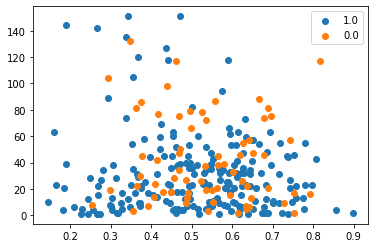

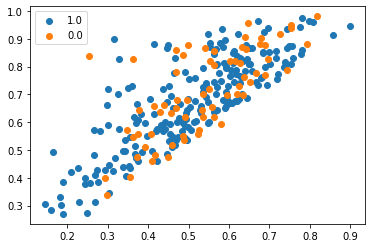

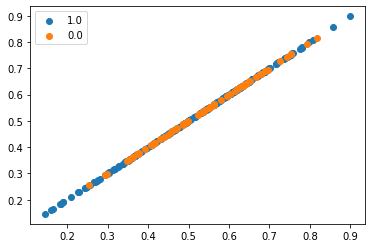

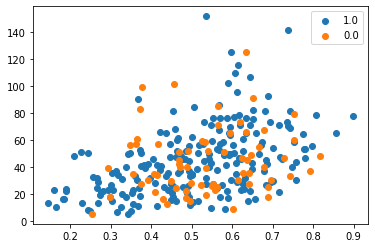

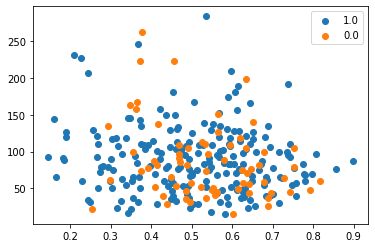

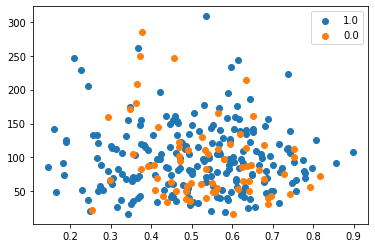

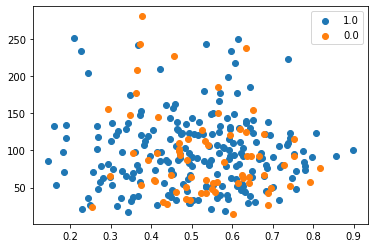

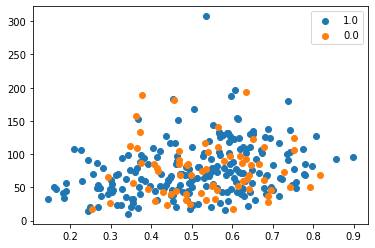

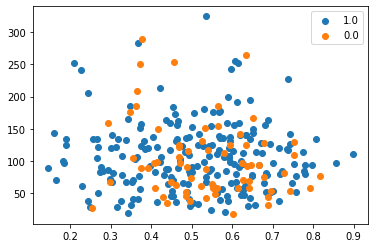

In [17]:
for i in range(1,10):
  for l,_ in counter.items():
    row_ix = np.where(y==l)[0]
    pyplot.scatter(x_values[row_ix,3],x_values[row_ix,i],label=str(l))
  pyplot.legend()
  pyplot.show()

In [18]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [19]:
oversample = SMOTE()
X,Y = oversample.fit_resample(x_values,y_values)
counter = Counter(Y)
print(counter)

Counter({1.0: 213, 0.0: 213})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


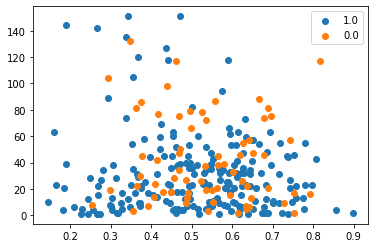

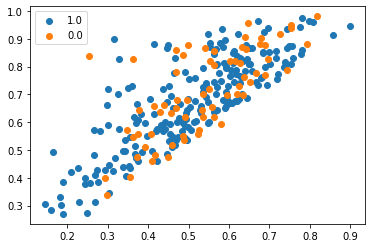

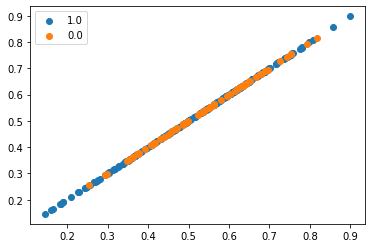

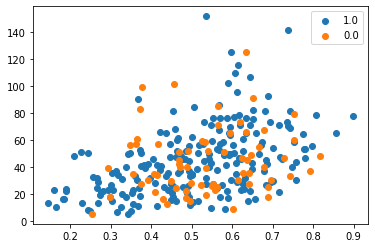

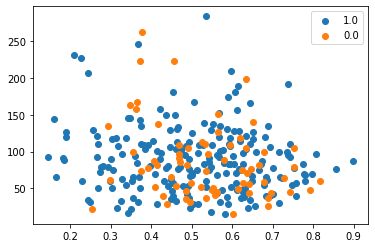

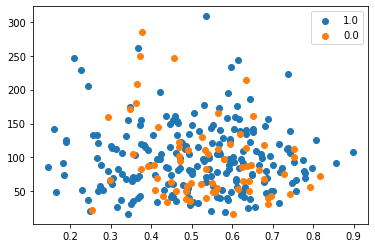

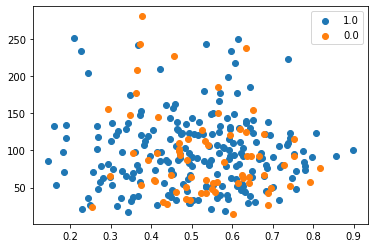

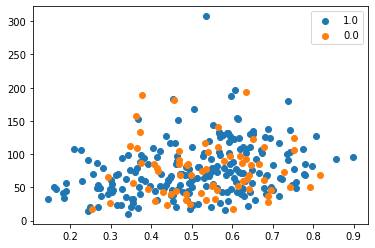

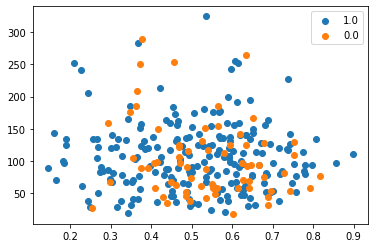

In [20]:
for i in range(1,10):
  for l,_ in counter.items():
    row_ix = np.where(y==l)[0]
    pyplot.scatter(x_values[row_ix,3],x_values[row_ix,i],label=str(l))
  pyplot.legend()
  pyplot.show()

# RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [ ]:
estimator = SVR(kernel="linear")
selector = RFE(estimator,n_features_to_select=1,step=2)
selector = selector.fit(X,Y)

NameError: ignored

In [ ]:
X_t = selector.fit_transform(X,Y)

# RF

In [21]:
xtrain_t,xtest_t,ytrain_t,ytest_t = train_test_split(X_t,Y,test_size=0.3,random_state=5)

NameError: ignored

In [22]:
rfc_t = RandomForestClassifier()
rfc_t = rfc_t.fit(xtrain_t,ytrain_t)
result_t = rfc_t.score(xtest_t,ytest_t)
result_t

NameError: ignored

In [ ]:
np.mean(cross_val_score(rfc_t, xtest_t, ytest_t, scoring='roc_auc'))

In [ ]:
predictions_validation_t = rfc_t.predict_proba(xtest_t)[:,-1]
fpr,tpr,_ = roc_curve(ytest_t,predictions_validation_t)
roc_auc = auc(fpr,tpr)
plt.title("ROC Validation")
plt.plot(fpr,tpr,'b',label="AUC =%0.2f"%roc_auc)
plt.legend(loc="lower-right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## Original

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=5)

In [24]:
rfc = RandomForestClassifier()
rfc = rfc.fit(xtrain,ytrain)
result = rfc.score(xtest,ytest)
result

0.828125

In [25]:
np.mean(cross_val_score(rfc, xtest, ytest, scoring='roc_auc'))

0.7146753246753247

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'lower-right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


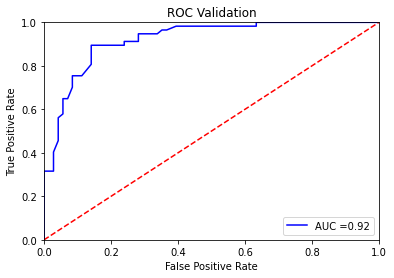

In [26]:
predictions_validation = rfc.predict_proba(xtest)[:,-1]
fpr,tpr,_ = roc_curve(ytest,predictions_validation)
roc_auc = auc(fpr,tpr)
plt.title("ROC Validation")
plt.plot(fpr,tpr,'b',label="AUC =%0.2f"%roc_auc)
plt.legend(loc="lower-right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# Data Preprocessing: get the standardized data

In [ ]:
train = train.astype(float)

In [ ]:
def cut_feature(feature_num,x):
  tmp = []
  for i in x:
    tmp.append(i[0:feature_num])
  return np.array(tmp)

In [ ]:
feature_num=100

In [ ]:
a = cut_feature(feature_num,train)

In [ ]:
a.shape

(282, 15)

In [ ]:
train_scaled = preprocessing.scale(a)

In [ ]:
train_scaled2 = preprocessing.normalize(a,norm='l2')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(feature_num,activation="relu"),
    keras.layers.Dense(4096,activation="relu"),
    keras.layers.Dense(2048,activation="relu"),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.000001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
y_true = [0, 1, 0, 0]
y_pred = [-18.6, 0.51, 2.94, -12.8]
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
bce(y_true, y_pred).numpy()


0.865458

In [ ]:
len(label)

282

In [ ]:
label

array([1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
RawData = pd.read_excel(path,engine="openpyxl")

In [ ]:
RawData.head()

,ID,SOURCE,FNCLCC grade,TIME,T1_original_shape_Elongation,T1_original_shape_Flatness,T1_original_shape_LeastAxisLength,T1_original_shape_MajorAxisLength,T1_original_shape_Maximum2DDiameterColumn,T1_original_shape_Maximum2DDiameterRow,T1_original_shape_Maximum2DDiameterSlice,T1_original_shape_Maximum3DDiameter,T1_original_shape_MeshVolume,T1_original_shape_MinorAxisLength,T1_original_shape_Sphericity,T1_original_shape_SurfaceArea,T1_original_shape_SurfaceVolumeRatio,T1_original_shape_VoxelVolume,T1_original_firstorder_10Percentile,T1_original_firstorder_90Percentile,T1_original_firstorder_Energy,T1_original_firstorder_Entropy,T1_original_firstorder_InterquartileRange,T1_original_firstorder_Kurtosis,T1_original_firstorder_Maximum,T1_original_firstorder_MeanAbsoluteDeviation,T1_original_firstorder_Mean,T1_original_firstorder_Median,T1_original_firstorder_Minimum,T1_original_firstorder_Range,T1_original_firstorder_RobustMeanAbsoluteDeviation,T1_original_firstorder_RootMeanSquared,T1_original_firstorder_Skewness,T1_original_firstorder_TotalEnergy,T1_original_firstorder_Uniformity,T1_original_firstorder_Variance,T1_original_glcm_Autocorrelation,T1_original_glcm_JointAverage,T1_original_glcm_ClusterProminence,T1_original_glcm_ClusterShade,...,T2_lbp-2D_glrlm_RunPercentage,T2_lbp-2D_glrlm_RunVariance,T2_lbp-2D_glrlm_ShortRunEmphasis,T2_lbp-2D_glrlm_ShortRunHighGrayLevelEmphasis,T2_lbp-2D_glrlm_ShortRunLowGrayLevelEmphasis,T2_lbp-2D_glszm_GrayLevelNonUniformity,T2_lbp-2D_glszm_GrayLevelNonUniformityNormalized,T2_lbp-2D_glszm_GrayLevelVariance,T2_lbp-2D_glszm_HighGrayLevelZoneEmphasis,T2_lbp-2D_glszm_LargeAreaEmphasis,T2_lbp-2D_glszm_LargeAreaHighGrayLevelEmphasis,T2_lbp-2D_glszm_LargeAreaLowGrayLevelEmphasis,T2_lbp-2D_glszm_LowGrayLevelZoneEmphasis,T2_lbp-2D_glszm_SizeZoneNonUniformity,T2_lbp-2D_glszm_SizeZoneNonUniformityNormalized,T2_lbp-2D_glszm_SmallAreaEmphasis,T2_lbp-2D_glszm_SmallAreaHighGrayLevelEmphasis,T2_lbp-2D_glszm_SmallAreaLowGrayLevelEmphasis,T2_lbp-2D_glszm_ZoneEntropy,T2_lbp-2D_glszm_ZonePercentage,T2_lbp-2D_glszm_ZoneVariance,T2_lbp-2D_gldm_DependenceEntropy,T2_lbp-2D_gldm_DependenceNonUniformity,T2_lbp-2D_gldm_DependenceNonUniformityNormalized,T2_lbp-2D_gldm_DependenceVariance,T2_lbp-2D_gldm_GrayLevelNonUniformity,T2_lbp-2D_gldm_GrayLevelVariance,T2_lbp-2D_gldm_HighGrayLevelEmphasis,T2_lbp-2D_gldm_LargeDependenceEmphasis,T2_lbp-2D_gldm_LargeDependenceHighGrayLevelEmphasis,T2_lbp-2D_gldm_LargeDependenceLowGrayLevelEmphasis,T2_lbp-2D_gldm_LowGrayLevelEmphasis,T2_lbp-2D_gldm_SmallDependenceEmphasis,T2_lbp-2D_gldm_SmallDependenceHighGrayLevelEmphasis,T2_lbp-2D_gldm_SmallDependenceLowGrayLevelEmphasis,T2_lbp-2D_ngtdm_Busyness,T2_lbp-2D_ngtdm_Coarseness,T2_lbp-2D_ngtdm_Complexity,T2_lbp-2D_ngtdm_Contrast,T2_lbp-2D_ngtdm_Strength
0,140999,2.0,1.0,40.0,0.596244,0.486735,52.063320,106.964313,116.619094,135.507441,80.919713,136.228729,229691.37980,63.776824,0.697354,26009.203160,0.113235,231498.13080,-31.481636,6.227611,3.564084e+08,3.692858,20.210780,20.275447,174.665738,13.185712,-12.327747,-14.282435,-57.219091,231.884829,8.552842,288.334891,2.793937,1.924606e+10,0.094723,381.684507,106.276189,9.852868,27675.420320,546.128461,...,0.521915,1.771271,0.604388,1.534747,0.371798,54.750000,0.570312,0.214844,3.062500,8587.218750,17324.218750,6402.968750,0.484375,22.708333,0.236545,0.500215,1.720681,0.195099,3.867813,0.026381,7150.334961,3.610008,654.308052,0.179804,2.451262,1869.460016,0.243135,2.251443,25.728772,52.361913,19.070486,0.687139,0.072090,0.188458,0.042999,1710.831040,0.001162,0.472851,0.114806,0.001164
1,161157,2.0,1.0,47.0,0.831942,0.626533,28.064491,44.793331,50.478237,51.614460,48.166378,55.064076,27523.40903,37.265456,0.660890,6670.468078,0.242356,28056.41695,-91.795709,-20.886758,6.931363e+07,4.409366,29.008603,13.880427,196.300647,24.723969,-59.659565,-68.091071,-121.222086,317.522733,12.705967,243.501744,2.811486,1.663552e+09,0.064001,1529.574537,222.748740,13.424023,557182.665700,7943.980393,...,0.509755,1.839

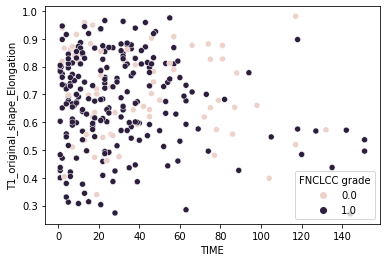

In [ ]:
sns.scatterplot(x='TIME',y='T1_original_shape_Elongation',data=RawData,hue='FNCLCC grade')

In [ ]:
his = model.fit(a,label,epochs=10)
print(his.history)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:5017: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


9/9 [==============================] - 1s 85ms/step - loss: 227208071789704433191095696883712.0000 - accuracy: 0.6099
Epoch 2/10
9/9 [==============================] - 1s 85ms/step - loss: 0.6931 - accuracy: 0.7589
Epoch 3/10
9/9 [==============================] - 1s 86ms/step - loss: 0.6931 - accuracy: 0.7589
Epoch 4/10
9/9 [==============================] - 1s 84ms/step - loss: 0.6931 - accuracy: 0.7589
Epoch 5/10
9/9 [==============================] - 1s 83ms/step - loss: 0.6931 - accuracy: 0.7589
Epoch 6/10
9/9 [==============================] - 1s 85ms/step - loss: 0.6931 - accuracy: 0.7589
Epoch 7/10
9/9 [==============================] - 1s 84ms/step - loss: 0.6931 - accuracy: 0.7589
Epoch 8/10
9/9 [==============================] - 1s 83ms/step - loss: 0.6931 - accuracy: 0.7589
Epoch 9/10
9/9 [==============================] - 1s 82ms/step - loss: 0.6931 - accuracy: 0.7589
Epoch 10/10
9/9 [==============================] - 1s 84ms/step - loss: 0.6931 - accuracy: 0.7589
{'loss':

#Random Forest


In [ ]:
import numpy as np
import scipy
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import roc_curve,auc,roc_auc_score

import matplotlib.pyplot as plt
from openpyxl import load_workbook

In [ ]:
path ="/content/drive/MyDrive/Document/数据1.xlsx"
df = pd.read_excel(path,engine="openpyxl")

In [ ]:
df.head()

,ID,SOURCE,FNCLCC_grade,TIME,T1_original_shape_Elongation,T1_original_shape_Flatness,T1_original_shape_LeastAxisLength,T1_original_shape_MajorAxisLength,T1_original_shape_Maximum2DDiameterColumn,T1_original_shape_Maximum2DDiameterRow,T1_original_shape_Maximum2DDiameterSlice,T1_original_shape_Maximum3DDiameter,T1_original_shape_MeshVolume,T1_original_shape_MinorAxisLength,T1_original_shape_Sphericity,T1_original_shape_SurfaceArea,T1_original_shape_SurfaceVolumeRatio,T1_original_shape_VoxelVolume,T1_original_firstorder_10Percentile,T1_original_firstorder_90Percentile,T1_original_firstorder_Energy,T1_original_firstorder_Entropy,T1_original_firstorder_InterquartileRange,T1_original_firstorder_Kurtosis,T1_original_firstorder_Maximum,T1_original_firstorder_MeanAbsoluteDeviation,T1_original_firstorder_Mean,T1_original_firstorder_Median,T1_original_firstorder_Minimum,T1_original_firstorder_Range,T1_original_firstorder_RobustMeanAbsoluteDeviation,T1_original_firstorder_RootMeanSquared,T1_original_firstorder_Skewness,T1_original_firstorder_TotalEnergy,T1_original_firstorder_Uniformity,T1_original_firstorder_Variance,T1_original_glcm_Autocorrelation,T1_original_glcm_JointAverage,T1_original_glcm_ClusterProminence,T1_original_glcm_ClusterShade,...,T2_lbp-2D_glrlm_RunPercentage,T2_lbp-2D_glrlm_RunVariance,T2_lbp-2D_glrlm_ShortRunEmphasis,T2_lbp-2D_glrlm_ShortRunHighGrayLevelEmphasis,T2_lbp-2D_glrlm_ShortRunLowGrayLevelEmphasis,T2_lbp-2D_glszm_GrayLevelNonUniformity,T2_lbp-2D_glszm_GrayLevelNonUniformityNormalized,T2_lbp-2D_glszm_GrayLevelVariance,T2_lbp-2D_glszm_HighGrayLevelZoneEmphasis,T2_lbp-2D_glszm_LargeAreaEmphasis,T2_lbp-2D_glszm_LargeAreaHighGrayLevelEmphasis,T2_lbp-2D_glszm_LargeAreaLowGrayLevelEmphasis,T2_lbp-2D_glszm_LowGrayLevelZoneEmphasis,T2_lbp-2D_glszm_SizeZoneNonUniformity,T2_lbp-2D_glszm_SizeZoneNonUniformityNormalized,T2_lbp-2D_glszm_SmallAreaEmphasis,T2_lbp-2D_glszm_SmallAreaHighGrayLevelEmphasis,T2_lbp-2D_glszm_SmallAreaLowGrayLevelEmphasis,T2_lbp-2D_glszm_ZoneEntropy,T2_lbp-2D_glszm_ZonePercentage,T2_lbp-2D_glszm_ZoneVariance,T2_lbp-2D_gldm_DependenceEntropy,T2_lbp-2D_gldm_DependenceNonUniformity,T2_lbp-2D_gldm_DependenceNonUniformityNormalized,T2_lbp-2D_gldm_DependenceVariance,T2_lbp-2D_gldm_GrayLevelNonUniformity,T2_lbp-2D_gldm_GrayLevelVariance,T2_lbp-2D_gldm_HighGrayLevelEmphasis,T2_lbp-2D_gldm_LargeDependenceEmphasis,T2_lbp-2D_gldm_LargeDependenceHighGrayLevelEmphasis,T2_lbp-2D_gldm_LargeDependenceLowGrayLevelEmphasis,T2_lbp-2D_gldm_LowGrayLevelEmphasis,T2_lbp-2D_gldm_SmallDependenceEmphasis,T2_lbp-2D_gldm_SmallDependenceHighGrayLevelEmphasis,T2_lbp-2D_gldm_SmallDependenceLowGrayLevelEmphasis,T2_lbp-2D_ngtdm_Busyness,T2_lbp-2D_ngtdm_Coarseness,T2_lbp-2D_ngtdm_Complexity,T2_lbp-2D_ngtdm_Contrast,T2_lbp-2D_ngtdm_Strength
0,140999,2.0,1.0,40.0,0.596244,0.486735,52.063320,106.964313,116.619094,135.507441,80.919713,136.228729,229691.37980,63.776824,0.697354,26009.203160,0.113235,231498.13080,-31.481636,6.227611,3.564084e+08,3.692858,20.210780,20.275447,174.665738,13.185712,-12.327747,-14.282435,-57.219091,231.884829,8.552842,288.334891,2.793937,1.924606e+10,0.094723,381.684507,106.276189,9.852868,27675.420320,546.128461,...,0.521915,1.771271,0.604388,1.534747,0.371798,54.750000,0.570312,0.214844,3.062500,8587.218750,17324.218750,6402.968750,0.484375,22.708333,0.236545,0.500215,1.720681,0.195099,3.867813,0.026381,7150.334961,3.610008,654.308052,0.179804,2.451262,1869.460016,0.243135,2.251443,25.728772,52.361913,19.070486,0.687139,0.072090,0.188458,0.042999,1710.831040,0.001162,0.472851,0.114806,0.001164
1,161157,2.0,1.0,47.0,0.831942,0.626533,28.064491,44.793331,50.478237,51.614460,48.166378,55.064076,27523.40903,37.265456,0.660890,6670.468078,0.242356,28056.41695,-91.795709,-20.886758,6.931363e+07,4.409366,29.008603,13.880427,196.300647,24.723969,-59.659565,-68.091071,-121.222086,317.522733,12.705967,243.501744,2.811486,1.663552e+09,0.064001,1529.574537,222.748740,13.424023,557182.665700,7943.980393,...,0.509755,1.839

In [ ]:
df.columns.values.tolist()

In [ ]:
df.FNCLCC_grade.value_counts()

1.0    214
0.0     68
Name: FNCLCC_grade, dtype: int64

In [ ]:
DF = df.drop(df.tail(330-282).index) #原数据一读就是330行，不知道什么情况

In [ ]:
y = DF.FNCLCC_grade
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: FNCLCC_grade, dtype: float64

In [ ]:
x = DF.drop('FNCLCC_grade',axis=1)
x = x.drop('ID',axis=1)
x.head()

,SOURCE,TIME,T1_original_shape_Elongation,T1_original_shape_Flatness,T1_original_shape_LeastAxisLength,T1_original_shape_MajorAxisLength,T1_original_shape_Maximum2DDiameterColumn,T1_original_shape_Maximum2DDiameterRow,T1_original_shape_Maximum2DDiameterSlice,T1_original_shape_Maximum3DDiameter,T1_original_shape_MeshVolume,T1_original_shape_MinorAxisLength,T1_original_shape_Sphericity,T1_original_shape_SurfaceArea,T1_original_shape_SurfaceVolumeRatio,T1_original_shape_VoxelVolume,T1_original_firstorder_10Percentile,T1_original_firstorder_90Percentile,T1_original_firstorder_Energy,T1_original_firstorder_Entropy,T1_original_firstorder_InterquartileRange,T1_original_firstorder_Kurtosis,T1_original_firstorder_Maximum,T1_original_firstorder_MeanAbsoluteDeviation,T1_original_firstorder_Mean,T1_original_firstorder_Median,T1_original_firstorder_Minimum,T1_original_firstorder_Range,T1_original_firstorder_RobustMeanAbsoluteDeviation,T1_original_firstorder_RootMeanSquared,T1_original_firstorder_Skewness,T1_original_firstorder_TotalEnergy,T1_original_firstorder_Uniformity,T1_original_firstorder_Variance,T1_original_glcm_Autocorrelation,T1_original_glcm_JointAverage,T1_original_glcm_ClusterProminence,T1_original_glcm_ClusterShade,T1_original_glcm_ClusterTendency,T1_original_glcm_Contrast,...,T2_lbp-2D_glrlm_RunPercentage,T2_lbp-2D_glrlm_RunVariance,T2_lbp-2D_glrlm_ShortRunEmphasis,T2_lbp-2D_glrlm_ShortRunHighGrayLevelEmphasis,T2_lbp-2D_glrlm_ShortRunLowGrayLevelEmphasis,T2_lbp-2D_glszm_GrayLevelNonUniformity,T2_lbp-2D_glszm_GrayLevelNonUniformityNormalized,T2_lbp-2D_glszm_GrayLevelVariance,T2_lbp-2D_glszm_HighGrayLevelZoneEmphasis,T2_lbp-2D_glszm_LargeAreaEmphasis,T2_lbp-2D_glszm_LargeAreaHighGrayLevelEmphasis,T2_lbp-2D_glszm_LargeAreaLowGrayLevelEmphasis,T2_lbp-2D_glszm_LowGrayLevelZoneEmphasis,T2_lbp-2D_glszm_SizeZoneNonUniformity,T2_lbp-2D_glszm_SizeZoneNonUniformityNormalized,T2_lbp-2D_glszm_SmallAreaEmphasis,T2_lbp-2D_glszm_SmallAreaHighGrayLevelEmphasis,T2_lbp-2D_glszm_SmallAreaLowGrayLevelEmphasis,T2_lbp-2D_glszm_ZoneEntropy,T2_lbp-2D_glszm_ZonePercentage,T2_lbp-2D_glszm_ZoneVariance,T2_lbp-2D_gldm_DependenceEntropy,T2_lbp-2D_gldm_DependenceNonUniformity,T2_lbp-2D_gldm_DependenceNonUniformityNormalized,T2_lbp-2D_gldm_DependenceVariance,T2_lbp-2D_gldm_GrayLevelNonUniformity,T2_lbp-2D_gldm_GrayLevelVariance,T2_lbp-2D_gldm_HighGrayLevelEmphasis,T2_lbp-2D_gldm_LargeDependenceEmphasis,T2_lbp-2D_gldm_LargeDependenceHighGrayLevelEmphasis,T2_lbp-2D_gldm_LargeDependenceLowGrayLevelEmphasis,T2_lbp-2D_gldm_LowGrayLevelEmphasis,T2_lbp-2D_gldm_SmallDependenceEmphasis,T2_lbp-2D_gldm_SmallDependenceHighGrayLevelEmphasis,T2_lbp-2D_gldm_SmallDependenceLowGrayLevelEmphasis,T2_lbp-2D_ngtdm_Busyness,T2_lbp-2D_ngtdm_Coarseness,T2_lbp-2D_ngtdm_Complexity,T2_lbp-2D_ngtdm_Contrast,T2_lbp-2D_ngtdm_Strength
0,2.0,40.0,0.596244,0.486735,52.063320,106.964313,116.619094,135.507441,80.919713,136.228729,229691.37980,63.776824,0.697354,26009.203160,0.113235,231498.13080,-31.481636,6.227611,3.564084e+08,3.692858,20.210780,20.275447,174.665738,13.185712,-12.327747,-14.282435,-57.219091,231.884829,8.552842,288.334891,2.793937,1.924606e+10,0.094723,381.684507,106.276189,9.852868,27675.420320,546.128461,43.376040,6.591493,...,0.521915,1.771271,0.604388,1.534747,0.371798,54.750000,0.570312,0.214844,3.062500,8587.218750,17324.218750,6402.968750,0.484375,22.708333,0.236545,0.500215,1.720681,0.195099,3.867813,0.026381,7150.334961,3.610008,654.308052,0.179804,2.451262,1869.460016,0.243135,2.251443,25.728772,52.361913,19.070486,0.687139,0.072090,0.188458,0.042999,1710.831040,0.001162,0.472851,0.114806,0.001164
1,2.0,47.0,0.831942,0.626533,28.064491,44.793331,50.478237,51.614460,48.166378,55.064076,27523.40903,37.265456,0.660890,6670.468078,0.242356,28056.41695,-91.795709,-20.886758,6.931363e+07,4.409366,29.008603,13.880427,196.300647,24.723969,-59.659565,-68.091071,-121.222086,317.522733,12.705967,243.501744,2.811486,1.663552e+09,0.064001,1529.574537,222.748740,13.424023,5571

In [ ]:
np.any(np.isnan(x))

True

In [ ]:
np.all(np.isfinite(x))

False

In [ ]:
y.shape,x.shape

((282,), (282, 2760))

In [ ]:
for i in range(282):
  tmp = x.iloc[i]
  if np.any(np.isnan(tmp)):
    print("nan:",i)
  if ~np.all(np.isfinite(tmp)):
    print("infinite:",i)
  # print(np.any(np.isnan(tmp)))
  

nan: 45
infinite: 45


In [ ]:
y.iloc[45] ##直接踢掉，败家玩意

1.0

In [ ]:
x = x.drop(45)
y = y.drop(45)

In [ ]:
for i in range(281):
  tmp = x.iloc[i]
  if np.any(np.isnan(tmp)):
    print("nan:",i)
  if ~np.all(np.isfinite(tmp)):
    print("infinite:",i)
  # print(np.any(np.isnan(tmp)))
  

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=5)

In [ ]:
rfc = RandomForestClassifier()
rfc = rfc.fit(xtrain,ytrain)
result = rfc.score(xtest,ytest)
result

0.7764705882352941

In [ ]:
print('All tree:%s'%rfc.estimators_)

All tree:[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1126951275, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1909514616, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_

In [ ]:
len(rfc.estimators_)

100

In [ ]:
print(rfc.classes_)
print(rfc.n_classes_)

[0. 1.]
2


In [ ]:
print('判定结果：%s'%rfc.predict(xtest))

判定结果：[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
print("判定结果：%s"%rfc.predict_proba(xtest)[:,:])

判定结果：[[0.14 0.86]
 [0.16 0.84]
 [0.22 0.78]
 [0.2  0.8 ]
 [0.38 0.62]
 [0.13 0.87]
 [0.28 0.72]
 [0.28 0.72]
 [0.58 0.42]
 [0.26 0.74]
 [0.16 0.84]
 [0.35 0.65]
 [0.36 0.64]
 [0.32 0.68]
 [0.18 0.82]
 [0.39 0.61]
 [0.21 0.79]
 [0.4  0.6 ]
 [0.28 0.72]
 [0.29 0.71]
 [0.34 0.66]
 [0.43 0.57]
 [0.44 0.56]
 [0.18 0.82]
 [0.29 0.71]
 [0.14 0.86]
 [0.3  0.7 ]
 [0.28 0.72]
 [0.31 0.69]
 [0.4  0.6 ]
 [0.34 0.66]
 [0.48 0.52]
 [0.28 0.72]
 [0.1  0.9 ]
 [0.18 0.82]
 [0.24 0.76]
 [0.11 0.89]
 [0.15 0.85]
 [0.18 0.82]
 [0.58 0.42]
 [0.26 0.74]
 [0.26 0.74]
 [0.15 0.85]
 [0.19 0.81]
 [0.38 0.62]
 [0.25 0.75]
 [0.32 0.68]
 [0.16 0.84]
 [0.32 0.68]
 [0.17 0.83]
 [0.17 0.83]
 [0.21 0.79]
 [0.2  0.8 ]
 [0.18 0.82]
 [0.17 0.83]
 [0.4  0.6 ]
 [0.27 0.73]
 [0.28 0.72]
 [0.29 0.71]
 [0.24 0.76]
 [0.11 0.89]
 [0.25 0.75]
 [0.14 0.86]
 [0.3  0.7 ]
 [0.26 0.74]
 [0.14 0.86]
 [0.41 0.59]
 [0.57 0.43]
 [0.23 0.77]
 [0.19 0.81]
 [0.34 0.66]
 [0.33 0.67]
 [0.34 0.66]
 [0.15 0.85]
 [0.41 0.59]
 [0.45 0.55]
 [0.11 

In [ ]:
print("判定结果：%s"%rfc.predict_proba(xtest)[:,0]) #label=0

判定结果：[0.14 0.16 0.22 0.2  0.38 0.13 0.28 0.28 0.58 0.26 0.16 0.35 0.36 0.32
 0.18 0.39 0.21 0.4  0.28 0.29 0.34 0.43 0.44 0.18 0.29 0.14 0.3  0.28
 0.31 0.4  0.34 0.48 0.28 0.1  0.18 0.24 0.11 0.15 0.18 0.58 0.26 0.26
 0.15 0.19 0.38 0.25 0.32 0.16 0.32 0.17 0.17 0.21 0.2  0.18 0.17 0.4
 0.27 0.28 0.29 0.24 0.11 0.25 0.14 0.3  0.26 0.14 0.41 0.57 0.23 0.19
 0.34 0.33 0.34 0.15 0.41 0.45 0.11 0.04 0.15 0.21 0.31 0.1  0.36 0.45
 0.2 ]


In [ ]:
d1 = np.array(pd.Series(rfc.predict_proba(xtest)[:,0]>0.5).map({False:1,True:0}))
d2=rfc.predict(xtest)
np.array_equal(d1,d2)

True

In [ ]:
roc_auc_score(ytest,rfc.predict_proba(xtest)[:,1])

0.4760765550239235

In [ ]:
print("各feature的重要性：%s"%rfc.feature_importances_)

各feature的重要性：[0.         0.00165826 0.00162681 ... 0.00054349 0.00027277 0.00067252]


In [ ]:
for i in rfc.feature_importances_:
  print(i)

0.0
0.0016582570254418541
0.0016268106382610482
0.00021384978492821615
0.0
0.0008580289242881146
0.0
0.0
0.0
0.0
0.0011660836248542398
0.0
0.0016414618020814406
0.0
0.0
0.0
0.0
0.0021583718163726145
0.0
0.000253968253968254
0.0002586093152130888
0.0002382187816997862
0.0
0.0031122037958693284
0.0008941901222211369
0.0006774505929805312
0.0
0.0005238803854875283
0.0024595306252402226
0.005134031894548148
0.0002386605783866058
0.0004057971014492753
0.0
0.001141965976827859
0.00024673485444531867
0.0007846017616053045
0.0
0.000244791666666667
0.002718636037654009
0.00013087606837606836
0.0
0.000505062659172249
0.00012380168630168653
0.00028809407153356214
0.0012022832161539408
0.0013473069758335116
0.00025628891656288936
0.0
0.0008151124338624335
0.0
0.0
0.0
0.0002374999999999999
0.0
0.0017395891957415882
0.0
0.0
0.0029070106294788512
0.0
0.0
0.0
0.003463394370432385
0.00029184614566477463
0.0012217098814933615
0.00046986301369863017
0.002637707503161493
0.00024085836734276338
0.0
0.0
0.0

In [ ]:
importances = rfc.feature_importances_
np.argsort(importances)[::-1]

array([ 583, 2061,  847, ..., 1558, 1559,    0])

In [ ]:
type(importances)

numpy.ndarray

In [ ]:
np.sum(importances==0)#这些重要性为零的可以直接踢掉

1481

Feature Ranking:
 1)T1_wavelet-HL_glcm_ClusterShade 0.005120
 2)T2_wavelet-HH_glcm_JointEntropy 0.004634
 3)T1_square_firstorder_RobustMeanAbsoluteDeviation 0.004489
 4)T2_wavelet-HL_glszm_LargeAreaLowGrayLevelEmphasis 0.004429
 5)T1_logarithm_gldm_LargeDependenceHighGrayLevelEmphasis 0.004103
 6)T2_wavelet-HH_ngtdm_Complexity 0.004072
 7)T1_wavelet-HL_glcm_MaximumProbability 0.004018
 8)T1_wavelet-HL_firstorder_Skewness 0.003805
 9)T2_log-sigma-3-0-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis 0.003521
10)T1_lbp-2D_firstorder_Uniformity 0.003483
11)T1_original_firstorder_Kurtosis 0.003412
12)T1_wavelet-LL_gldm_HighGrayLevelEmphasis 0.003227
13)T1_squareroot_glcm_SumEntropy  0.003098
14)T1_original_glcm_JointEnergy   0.002952
15)T1_lbp-2D_glcm_Imc1            0.002926
16)T1_exponential_glcm_SumEntropy 0.002877
17)T1_log-sigma-2-0-mm-3D_firstorder_Skewness 0.002853
18)T1_wavelet-LL_gldm_LargeDependenceHighGrayLevelEmphasis 0.002824
19)T2_wavelet-HH_gldm_LargeDependenceHighGrayLevelEmph

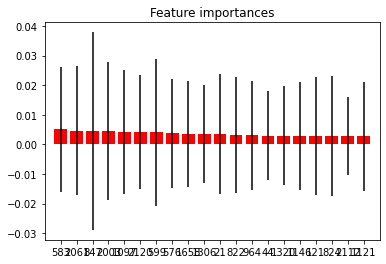

In [ ]:
shownum = 20
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("Feature Ranking:")
for f in range(min(shownum,xtrain.shape[1])):
  print("%2d)%-*s %f"%(f+1,30,xtrain.columns[indices[f]],importances[indices[f]]))
indices=indices[:shownum]
plt.figure()
plt.title("Feature importances")
plt.bar(range(shownum),importances[indices],color="r",yerr=std[indices],align="center")
plt.xticks(range(shownum),indices)
plt.xlim([-1,shownum])
plt.show()

In [ ]:
indices #这些就是比较重要的特征

array([ 583, 2061,  847, 2003, 1097, 2120,  599,  576, 1658, 1306,   21,
        822,  964,   44, 1320, 1146,  121,  824, 2112, 1121])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'lower-right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


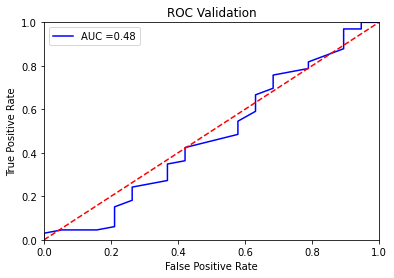

In [ ]:
predictions_validation = rfc.predict_proba(xtest)[:,-1]
fpr,tpr,_ = roc_curve(ytest,predictions_validation)
roc_auc = auc(fpr,tpr)
plt.title("ROC Validation")
plt.plot(fpr,tpr,'b',label="AUC =%0.2f"%roc_auc)
plt.legend(loc="lower-right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [ ]:
###当前就是这样把那些不用的再干掉

In [ ]:
clf = DecisionTreeClassifier(max_depth=None,min_samples_split=2,random_state=0)
scores = cross_val_score(clf,xtrain,ytrain)

In [ ]:
print(scores.mean()) #决策树不行

0.5765384615384617


In [ ]:
clf = RandomForestClassifier(n_estimators=425,max_depth=None,min_samples_split=2,random_state=0)
scores = cross_val_score(clf,xtrain,ytrain)
print(scores.mean())

0.7397435897435898


In [ ]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [ ]:
param_test1 = {'n_estimators':range(25,500,25)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(min_samples_split=20,
                                                         min_samples_leaf=10,
                                                         max_depth=8,
                                                         random_state=10),
                        param_grid = param_test1,
                        scoring="roc_auc",
                        cv=5)
gsearch1.fit(xtrain,ytrain)
print(gsearch1.best_params_,gsearch1.best_score_)

{'n_estimators': 425} 0.5673563218390805


In [ ]:
param_test2 = {'min_samples_split':range(20,150,10),'min_samples_leaf':range(10,30,5)}
gsearch2 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=425,
                                                         max_depth=8,
                                                         random_state=10),
                        param_grid = param_test2,
                        scoring="roc_auc",
                        cv=5)
gsearch2.fit(xtrain,ytrain)
print(gsearch2.best_params_,gsearch2.best_score_)

{'min_samples_leaf': 25, 'min_samples_split': 100} 0.5945261813537674


In [ ]:
param_test3 = {'max_depth':range(5,30,2)}
gsearch3 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=425,
                                                         min_samples_split=100,
                                                         min_samples_leaf=25,
                                                         random_state=10),
                        param_grid = param_test3,
                        scoring="roc_auc",
                        cv=5)
gsearch3.fit(xtrain,ytrain)
print(gsearch3.best_params_,gsearch3.best_score_)

{'max_depth': 5} 0.5945261813537674


In [ ]:
roc_auc_score(ytest,gsearch3.best_estimator_.predict_proba(xtest)[:,1])

0.5454545454545455

In [ ]:
param_test4 = {'criterion':['gini','entropy'],'class_weight':[None,'balanced']}
gsearch4 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=425,
                                                         min_samples_split=100,
                                                         min_samples_leaf=25,
                                                         max_depth=5,
                                                         random_state=10),
                        param_grid = param_test4,
                        scoring="roc_auc",
                        cv=5)
gsearch4.fit(xtrain,ytrain)
print(gsearch4.best_params_,gsearch4.best_score_)

{'class_weight': 'balanced', 'criterion': 'entropy'} 0.5956551724137931


In [ ]:
roc_auc_score(ytest,gsearch4.best_estimator_.predict_proba(xtest)[:,1])

0.5175438596491229

In [ ]:
print("hhh")

hhh


# 简化特征

In [ ]:
indices

array([ 583, 2061,  847, 2003, 1097, 2120,  599,  576, 1658, 1306,   21,
        822,  964,   44, 1320, 1146,  121,  824, 2112, 1121])

In [ ]:
np.argsort(importances)[::-1]

array([ 583, 2061,  847, ..., 1558, 1559,    0])

In [ ]:
cut = np.argsort(importances)[::-1][1000:]

In [ ]:
cols = x.columns.values.tolist()

In [ ]:
cut

array([2660,  837, 2289, ..., 1558, 1559,    0])

In [ ]:
needtoremove =[]
for i in cut:
  needtoremove.append(cols[i])
needtoremove

['T2_gradient_gldm_LowGrayLevelEmphasis',
 'T1_square_firstorder_Energy',
 'T2_square_gldm_DependenceVariance',
 'T2_squareroot_firstorder_MeanAbsoluteDeviation',
 'T2_wavelet-LH_glcm_SumSquares',
 'T1_original_gldm_DependenceEntropy',
 'T2_wavelet-LH_firstorder_Kurtosis',
 'T2_lbp-2D_glszm_ZoneEntropy',
 'T2_log-sigma-2-0-mm-3D_glszm_SmallAreaLowGrayLevelEmphasis',
 'T2_log-sigma-2-0-mm-3D_glszm_HighGrayLevelZoneEmphasis',
 'T2_log-sigma-3-0-mm-3D_glszm_HighGrayLevelZoneEmphasis',
 'T1_wavelet-HL_glcm_DifferenceVariance',
 'T1_log-sigma-3-0-mm-3D_glrlm_GrayLevelNonUniformity',
 'T2_logarithm_glcm_DifferenceVariance',
 'T2_log-sigma-3-0-mm-3D_glcm_SumEntropy',
 'T2_gradient_ngtdm_Strength',
 'T2_squareroot_glcm_Correlation',
 'T1_gradient_gldm_SmallDependenceLowGrayLevelEmphasis',
 'T1_wavelet-HL_firstorder_Mean',
 'T1_log-sigma-2-0-mm-3D_gldm_DependenceNonUniformity',
 'T1_original_glcm_JointEntropy',
 'T2_original_glszm_GrayLevelVariance',
 'T1_wavelet-HL_glszm_SizeZoneNonUniformityN

In [ ]:
simplified_x = x.drop(columns=needtoremove,axis=1)

In [ ]:
simplified_x.head()

,TIME,T1_original_shape_Elongation,T1_original_shape_Flatness,T1_original_shape_MajorAxisLength,T1_original_shape_Maximum2DDiameterRow,T1_original_shape_MinorAxisLength,T1_original_shape_VoxelVolume,T1_original_firstorder_90Percentile,T1_original_firstorder_Energy,T1_original_firstorder_InterquartileRange,T1_original_firstorder_Kurtosis,T1_original_firstorder_Mean,T1_original_firstorder_RobustMeanAbsoluteDeviation,T1_original_firstorder_RootMeanSquared,T1_original_firstorder_Uniformity,T1_original_firstorder_Variance,T1_original_glcm_ClusterShade,T1_original_glcm_Contrast,T1_original_glcm_DifferenceAverage,T1_original_glcm_DifferenceEntropy,T1_original_glcm_DifferenceVariance,T1_original_glcm_JointEnergy,T1_original_glcm_Imc2,T1_original_glcm_InverseVariance,T1_original_glcm_MaximumProbability,T1_original_glcm_SumEntropy,T1_original_glcm_SumSquares,T1_original_glrlm_GrayLevelNonUniformity,T1_original_glrlm_GrayLevelVariance,T1_original_glrlm_HighGrayLevelRunEmphasis,T1_original_glrlm_LongRunHighGrayLevelEmphasis,T1_original_glrlm_RunEntropy,T1_original_glrlm_ShortRunLowGrayLevelEmphasis,T1_original_glszm_GrayLevelNonUniformity,T1_original_glszm_GrayLevelNonUniformityNormalized,T1_original_glszm_LargeAreaEmphasis,T1_original_glszm_LargeAreaHighGrayLevelEmphasis,T1_original_glszm_SmallAreaEmphasis,T1_original_glszm_SmallAreaHighGrayLevelEmphasis,T1_original_glszm_SmallAreaLowGrayLevelEmphasis,...,T2_gradient_glszm_GrayLevelVariance,T2_gradient_glszm_LargeAreaEmphasis,T2_gradient_glszm_LargeAreaHighGrayLevelEmphasis,T2_gradient_glszm_ZonePercentage,T2_gradient_gldm_DependenceEntropy,T2_gradient_gldm_GrayLevelVariance,T2_gradient_gldm_HighGrayLevelEmphasis,T2_lbp-2D_firstorder_Entropy,T2_lbp-2D_firstorder_InterquartileRange,T2_lbp-2D_firstorder_RobustMeanAbsoluteDeviation,T2_lbp-2D_firstorder_Variance,T2_lbp-2D_glcm_Autocorrelation,T2_lbp-2D_glcm_ClusterShade,T2_lbp-2D_glcm_ClusterTendency,T2_lbp-2D_glcm_Correlation,T2_lbp-2D_glcm_DifferenceAverage,T2_lbp-2D_glcm_DifferenceEntropy,T2_lbp-2D_glcm_Idm,T2_lbp-2D_glcm_Idmn,T2_lbp-2D_glcm_Id,T2_lbp-2D_glcm_Idn,T2_lbp-2D_glcm_InverseVariance,T2_lbp-2D_glcm_MaximumProbability,T2_lbp-2D_glcm_SumEntropy,T2_lbp-2D_glrlm_LowGrayLevelRunEmphasis,T2_lbp-2D_glrlm_RunPercentage,T2_lbp-2D_glrlm_RunVariance,T2_lbp-2D_glrlm_ShortRunHighGrayLevelEmphasis,T2_lbp-2D_glszm_GrayLevelNonUniformityNormalized,T2_lbp-2D_glszm_HighGrayLevelZoneEmphasis,T2_lbp-2D_glszm_LowGrayLevelZoneEmphasis,T2_lbp-2D_glszm_SizeZoneNonUniformity,T2_lbp-2D_glszm_SizeZoneNonUniformityNormalized,T2_lbp-2D_glszm_SmallAreaEmphasis,T2_lbp-2D_glszm_SmallAreaHighGrayLevelEmphasis,T2_lbp-2D_glszm_ZoneVariance,T2_lbp-2D_gldm_DependenceNonUniformityNormalized,T2_lbp-2D_gldm_SmallDependenceHighGrayLevelEmphasis,T2_lbp-2D_ngtdm_Coarseness,T2_lbp-2D_ngtdm_Contrast
0,40.0,0.596244,0.486735,106.964313,135.507441,63.776824,231498.13080,6.227611,3.564084e+08,20.210780,20.275447,-12.327747,8.552842,288.334891,0.094723,381.684507,546.128461,6.591493,1.252178,2.061792,5.012572,0.023538,0.947011,0.447181,0.053522,4.565083,12.491883,256.230016,19.198908,124.493033,350.174807,5.121846,0.011688,73.032598,0.070022,90.351870,9239.197507,0.595976,125.300985,0.009393,...,12.729964,36.227637,274.939544,0.445452,5.531589,10.545818,32.935697,0.980102,5.0,2.177166,8.005202,2.057174,0.071179,0.501992,0.022811,0.479641,0.998292,0.760180,0.904072,0.760180,0.840120,0.479641,0.327848,1.492935,0.654492,0.521915,1.771271,1.534747,0.570312,3.062500,0.484375,22.708333,0.236545,0.500215,1.720681,7150.334961,0.179804,0.188458,0.001162,0.114806
1,47.0,0.831942,0.626533,44.793331,51.614460,37.265456,28056.41695,-20.886758,6.931363e+07,29.008603,13.880427,-59.659565,12.705967,243.501744,0.064001,1529.574537,7943.980393,32.633276,3.191085,3.143107,22.366142,0.008397,0.939154,0.346097,0.021879,5.248013,58.854970,61.626500,66.643677,259.690807,335.823508,5.065098,0.010321,35.546243,0.051367,5.819364,956.848266,0.765487,260.897589,0.009499,...,18.663272,4.005367,223.465116,

In [ ]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(simplified_x,y,test_size=0.3,random_state=5)

In [ ]:
rfc2 = RandomForestClassifier(n_estimators=425,
                              min_samples_split=100,
                              min_samples_leaf=25,
                              max_depth=5,
                              random_state=10,
                              class_weight='balanced',
                              criterion='entropy'
                              )
rfc2 = rfc.fit(xtrain2,ytrain2)
result = rfc.score(xtest2,ytest2)
result

0.7647058823529411

In [ ]:
roc_auc_score(ytest2,rfc.predict_proba(xtest2)[:,1])

0.536682615629984

In [ ]:
print("各feature的重要性：%s"%rfc2.feature_importances_)

各feature的重要性：[6.01410117e-03 2.43519822e-04 2.04579510e-03 4.99612197e-04
 4.62627852e-04 7.32655502e-04 0.00000000e+00 3.80661777e-03
 6.09652903e-04 2.16119278e-03 6.41399417e-04 2.58548960e-04
 0.00000000e+00 6.36083991e-03 9.73259458e-04 2.17483976e-04
 7.86164824e-04 0.00000000e+00 0.00000000e+00 5.26510301e-04
 2.06887452e-04 4.12538336e-03 1.34074927e-03 5.20962026e-03
 2.56288917e-04 7.44493684e-04 2.89328284e-03 0.00000000e+00
 9.07778853e-04 6.50123686e-04 0.00000000e+00 0.00000000e+00
 6.74018438e-04 0.00000000e+00 2.16333219e-04 2.55208333e-04
 2.45328978e-03 1.22796262e-03 3.79270789e-03 1.81735458e-03
 0.00000000e+00 5.24718226e-04 2.05612379e-04 5.39382691e-03
 2.08152724e-03 5.84866321e-04 8.87234334e-04 2.55652174e-04
 2.82906980e-03 1.89646475e-03 0.00000000e+00 0.00000000e+00
 2.76656991e-03 4.23280423e-04 2.10616806e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.86092953e-04 1.25946023e-04
 1.28976982e-04 4.32056427e-04 3.17778791e-04 1.13124036e-03
 1.55994605

In [ ]:
np.sum(rfc2.feature_importances_==0)

195

Feature Ranking:
 1)T1_wavelet-HL_glszm_SizeZoneNonUniformityNormalized 0.008790
 2)T1_wavelet-HH_glcm_ClusterTendency 0.007792
 3)T1_wavelet-LL_firstorder_Median 0.006430
 4)T1_original_shape_SurfaceArea  0.006361
 5)T1_log-sigma-3-0-mm-3D_gldm_LowGrayLevelEmphasis 0.006261
 6)SOURCE                         0.006014
 7)T1_wavelet-LL_gldm_DependenceEntropy 0.005872
 8)T1_wavelet-LH_glcm_MaximumProbability 0.005750
 9)T1_wavelet-HL_ngtdm_Coarseness 0.005516
10)T1_original_glcm_DifferenceVariance 0.005394
11)T1_original_firstorder_MeanAbsoluteDeviation 0.005210
12)T1_wavelet-HL_glszm_SmallAreaEmphasis 0.005129
13)T1_log-sigma-5-0-mm-3D_firstorder_Energy 0.005097
14)T1_log-sigma-4-0-mm-3D_ngtdm_Strength 0.005033
15)T1_log-sigma-2-0-mm-3D_glcm_ClusterTendency 0.005022
16)T1_log-sigma-3-0-mm-3D_gldm_DependenceVariance 0.004728
17)T1_square_ngtdm_Strength       0.004622
18)T1_log-sigma-2-0-mm-3D_glszm_LargeAreaEmphasis 0.004564
19)T1_log-sigma-5-0-mm-3D_glrlm_LowGrayLevelRunEmphasis 0.004476

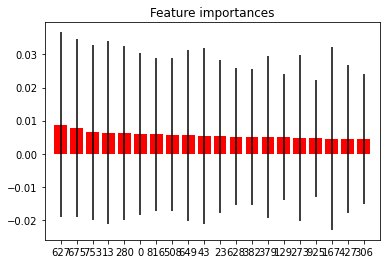

In [ ]:
shownum = 20
importances = rfc2.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc2.estimators_],axis=0)
indices2 = np.argsort(importances)[::-1]
print("Feature Ranking:")
for f in range(min(shownum,xtrain.shape[1])):
  print("%2d)%-*s %f"%(f+1,30,xtrain.columns[indices2[f]],importances[indices2[f]]))
indices2=indices2[:shownum]
plt.figure()
plt.title("Feature importances")
plt.bar(range(shownum),importances[indices2],color="r",yerr=std[indices2],align="center")
plt.xticks(range(shownum),indices2)
plt.xlim([-1,shownum])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'lower-right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


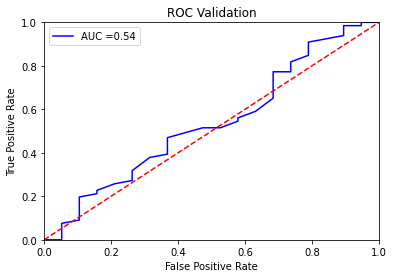

In [ ]:
predictions_validation = rfc2.predict_proba(xtest2)[:,1]
fpr,tpr,_ = roc_curve(ytest2,predictions_validation)
roc_auc = auc(fpr,tpr)
plt.title("ROC Validation")
plt.plot(fpr,tpr,'b',label="AUC =%0.2f"%roc_auc)
plt.legend(loc="lower-right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()